# (Multi)Polygon `_duplicated_interior_coordinates_list`
Function returns a list of duplicated interior coordinates for (Multi)LineString features.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

os.getcwd()

'/home/lukasz/Projects/geonurse/notebooks'

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

from geonurse.tools.polygon import has_interior_duplicates, _duplicated_interior_coordinates_list

## Load data

In [4]:
DATA_PATH = '../tests/tools/polygon/data/interior'

### Features with duplicates

#### Read data

In [5]:
polygons_with_duplicates = gpd.read_file(os.path.join(DATA_PATH, 'expected_polygon_with_interior_duplicates.geojson'))

In [6]:
polygons_with_duplicates.head()

,id,geometry
0,1,"(POLYGON ((151 -285, 352 -279, 352 -279, 364 -..."
1,11,(POLYGON ((614.4012341319128 -407.188693482606...
2,12,(POLYGON ((201.3135438049186 -609.113347220721...
3,13,(POLYGON ((681.7094520446183 -601.194733348638...
4,15,(POLYGON ((652.6745345136472 133.9165877763965...


#### Plot data

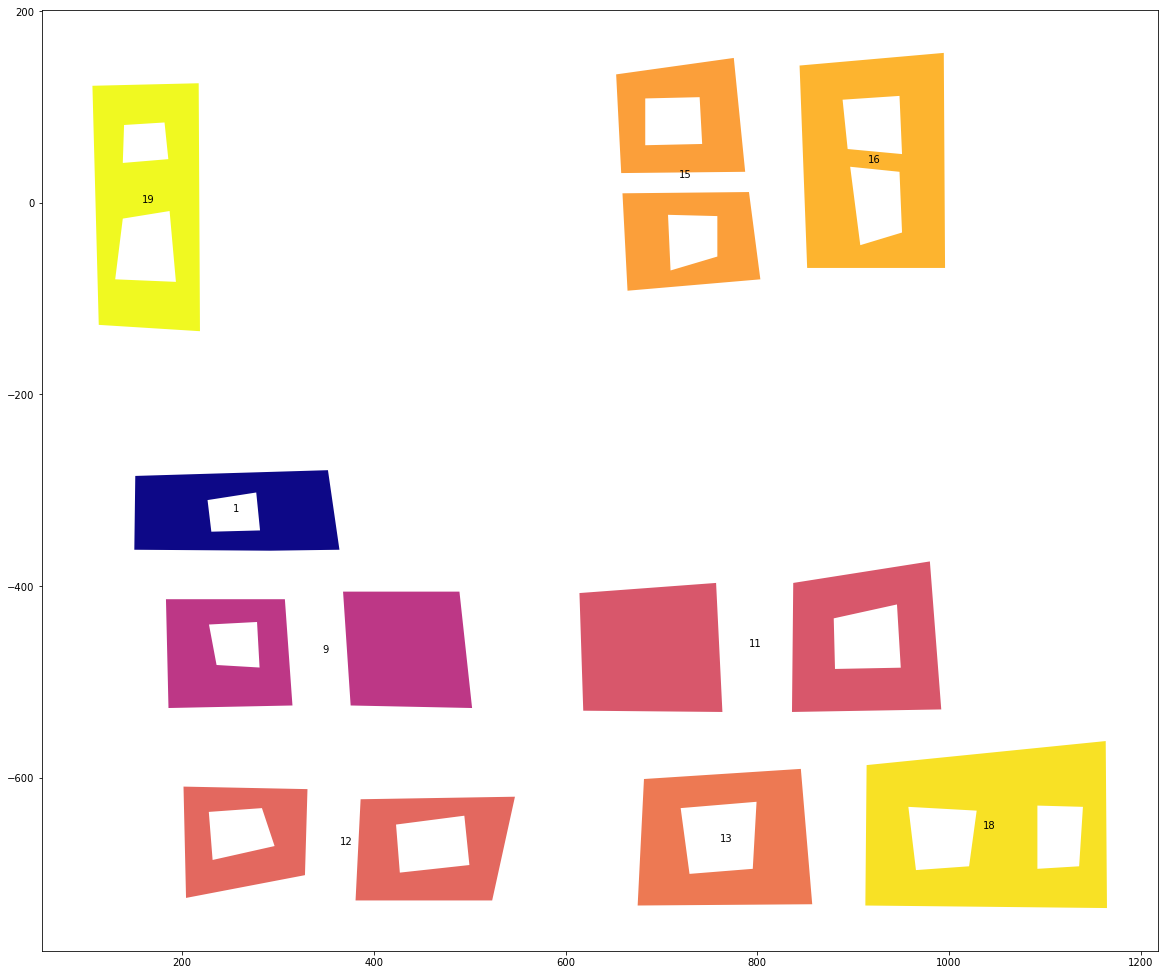

In [7]:
ax = polygons_with_duplicates.plot(figsize=(20,20), column='id', cmap='plasma')

polygons_with_duplicates.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Find duplicates

In [8]:
duplicated_coordinates = (
    polygons_with_duplicates.geometry
        .apply(_duplicated_interior_coordinates_list)
        .apply(MultiPoint)
)

assert len(polygons_with_duplicates) == len(duplicated_coordinates)

In [9]:
duplicated_coordinates

0       (POINT (281.1595670150887 -341.8601290379218))
1       (POINT (949.6225547167585 -485.0550632247553))
2    (POINT (296.3369102699141 -671.1424892187049),...
3    (POINT (795.2095842111407 -694.8983308349539),...
4    (POINT (742.4188250639208 61.32929394896931), ...
5        (POINT (948.3027857380778 111.4805151388281))
6       (POINT (1135.709980710708 -692.2587928775926))
7    (POINT (185.4763160607521 45.49206620480274), ...
8                                                   ()
Name: geometry, dtype: object

#### Plot filtered geometries

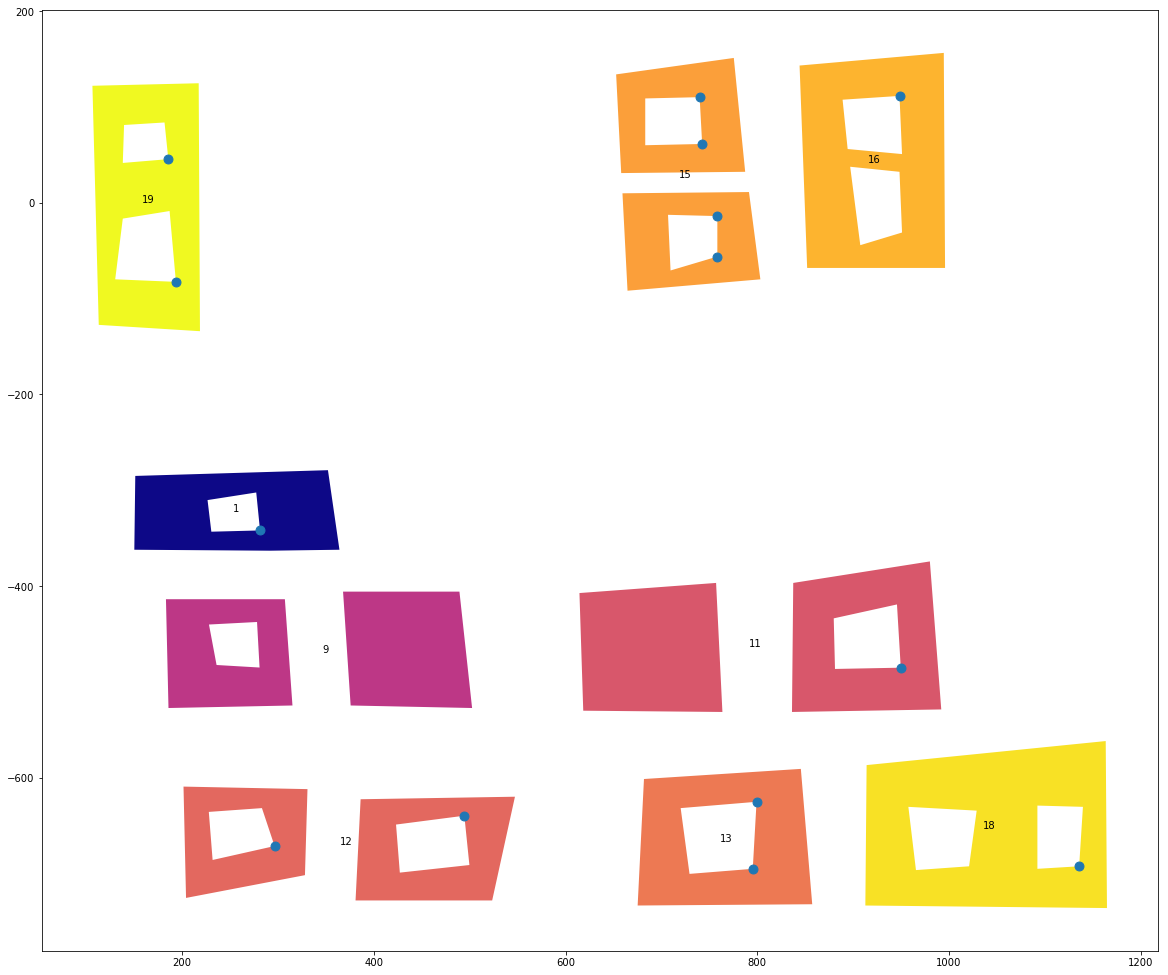

In [11]:
ax = polygons_with_duplicates.plot(figsize=(20,20), column='id', cmap='plasma')
duplicated_coordinates.plot(ax=ax, marker='o', markersize=80)

polygons_with_duplicates.apply(lambda x: ax.annotate(s=x.id, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
print()

#### Compare with EXPECTED data

In [11]:
expected_duplicates = gpd.read_file(os.path.join(DATA_PATH, 'expected_polygon_exterior_duplicates.geojson'))

In [12]:
expected_duplicates

,FEAT_ID,ERROR,geometry
0,0,line 0 contains 1 duplicate node(s) at 1,POINT (352 -279)
1,0,line 0 contains 1 duplicate node(s) at 2,POINT (364 -362)
2,1,line 0 contains 1 duplicate node(s) at 2,POINT (547.2375000000002 -355.8092948717949)
3,2,line 0 contains 1 duplicate node(s) at 3,POINT (349.4246794871795 -123.4272435897435)
4,3,line 0 contains 1 duplicate node(s) at 1,POINT (543.3964743589745 -27.40160256410235)
5,6,line 0 contains 1 duplicate node(s) at 2,POINT (774.2582516745898 -213.0176824942379)
6,8,line 0 contains 1 duplicate node(s) at 2,POINT (373.0484821557188 24.54073366825145)
7,9,line 0 contains 1 duplicate node(s) at 1,POINT (571.0138289577933 116.9245621758862)
8,10,line 0 contains 1 duplicate node(s) at 2,POINT (314.978647093777 -524.483161462835)
9,12,line 0 contains 1 duplicate node(s) at 1,POINT (77.42023093128762 61.49426507130534)


NOTE:
In order to compare the result `duplicated_coordinates` geopandas.GeoSeries has to be exploded. This will split multipart features into singlepart onces.

In [13]:
assert len(expected_duplicates) == len(duplicated_coordinates.explode())

In [14]:
duplicated_coordinates_geoseries = gpd.GeoSeries(
    duplicated_coordinates
        .explode()
        .reset_index()
        .drop(['level_0', 'level_1'], axis=1)
        .geometry
)

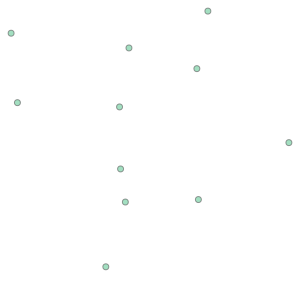

In [21]:
duplicated_coordinates_geoseries.unary_union

In [23]:
expected_duplicates.geometry.unary_union == duplicated_coordinates_geoseries.unary_union

True